In [119]:
from sklearn import datasets
breast_cancer = datasets.load_breast_cancer()

In [120]:
X = breast_cancer['data']
y = breast_cancer['target']

In [121]:
X.shape, y.shape

((569, 30), (569,))

In [122]:
# y.shape = (569,1)

In [123]:
import pandas as pd

df = pd.DataFrame(X)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [124]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

# pipeline only the continuous data

df= num_pipeline.fit_transform(df)
# put the resulting numpy matrix back into a dataframe
df = pd.DataFrame(df)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [125]:
from sklearn.decomposition import PCA
import pandas as pd

PCA_build  = PCA(n_components=.95, svd_solver = 'full') # captures 50% of the variance
PCA_model = PCA_build.fit_transform(df)

cnt = 1
column_header = []
for column in range(PCA_model.shape[1]):
    column_name = 'Comp_{}'.format(cnt)
    column_header.append(column_name)
    cnt += 1

X = pd.DataFrame(PCA_model, columns= column_header)
X


,Comp_1,Comp_2,Comp_3,Comp_4,Comp_5,Comp_6,Comp_7,Comp_8,Comp_9,Comp_10
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877402
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240988,-0.711905,1.106995
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097374,0.024066,0.454275
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059565,-1.405440,-1.116975
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263805,0.377704
...,...,...,...,...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,-0.074824,-2.375193,-0.596130,-0.035471,0.987929,0.256989
565,3.793382,-3.584048,2.088476,-2.506028,-0.510723,-0.246710,-0.716326,-1.113360,-0.105207,-0.108632
566,1.256179,-1.902297,0.562731,-2.089227,1.809991,-0.534447,-0.192758,0.341887,0.393917,0.520877
567,10.374794,1.672010,-1.877029,-2.356031,-0.033742,0.567936,0.223082,-0.280239,-0.542035,-0.089296


In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic regression

In [127]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Logistic_model = LogisticRegression(penalty = 'l2', max_iter = 3000)

Logistic_model.fit(X_train, y_train)

y_pred = Logistic_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9824561403508771


In [128]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.9859154929577465
Recall: 0.9859154929577465


# KNN

In [129]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 12)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.956140350877193


In [130]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.9583333333333334
Recall: 0.971830985915493


# Neural Network

In [131]:
from sklearn.neural_network import MLPClassifier

nn_classifier = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=1000, random_state=42)

nn_classifier.fit(X_train, y_train)

y_pred = nn_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9736842105263158


In [132]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.9857142857142858
Recall: 0.971830985915493


# Ensemble

In [133]:
from sklearn.ensemble import VotingClassifier

ensemble_classifier = VotingClassifier(estimators=[
    ('logistic', Logistic_model),
    ('knn', knn),
    ('nn', nn_classifier)
], voting='soft')

ensemble_classifier.fit(X_train, y_train)

y_pred = ensemble_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9649122807017544


In [134]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.971830985915493
Recall: 0.971830985915493


# Shap

In [135]:
! pip install shap

In [136]:
import shap
explainer = shap.PermutationExplainer(ensemble_classifier.predict,X_train)
shap_values = explainer.shap_values(X_test)

PermutationExplainer explainer: 115it [00:45,  2.38it/s]


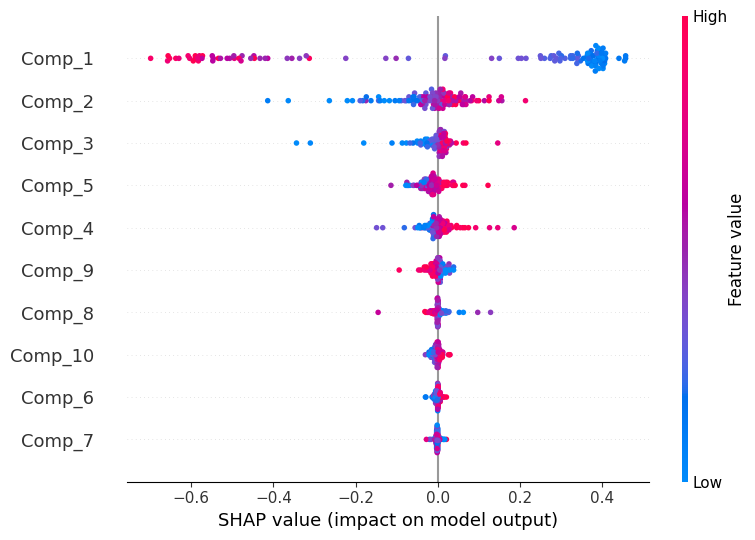

In [139]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,10))
shap.summary_plot(shap_values,X_test[:200],feature_names=X_test.columns)

### Exaplaining the feature preformance

This plot generated from SHAP indicates that Component 1 had the most significant impact on predicting whether someone had breast cancer. Specifically, lower values of Component 1 were associated with a higher likelihood of breast cancer, while higher values indicated a lower likelihood. The second most influential feature was Component 2, where lower values suggested no breast cancer, while higher values indicated its presence. Following Component 2, Component 3 exhibited similar descriptive patterns: lower values did not indicate breast cancer, whereas higher values did.
